In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import streamlit as st

In [2]:
warnings.filterwarnings(action='ignore', message='All-NaN slice encountered')
pd.options.mode.chained_assignment = None 

In [3]:
loan_df = pd.read_csv('loan_requests.csv')
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
pd.isnull(loan_df).sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
loan_df=loan_df.dropna()

In [6]:
pd.isnull(loan_df).sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
loan_df['CoapplicantIncome'] = loan_df['CoapplicantIncome'].astype('int64')
loan_df['LoanAmount'] = loan_df['LoanAmount'].astype('int64')
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].astype('int64')
loan_df['Credit_History'] = loan_df['Credit_History'].astype('int64')

In [9]:
loan_df.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History        int64
Property_Area        object
Loan_Status          object
dtype: object

In [10]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y


In [11]:
loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0,40,180,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0,133,360,0,Semiurban,N


In [12]:
loan_df.shape

(480, 13)

In [13]:
loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0,40,180,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0,133,360,0,Semiurban,N


In [14]:
#create column Total_Income
loan_df=loan_df.assign(Total_Income=loan_df.ApplicantIncome + loan_df.CoapplicantIncome)

In [15]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N,6091
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y,3000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y,4941
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y,6000
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y,9613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y,2900
610,LP002979,Male,Yes,3+,Graduate,No,4106,0,40,180,1,Rural,Y,4106
611,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y,8312
612,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y,7583


In [16]:
#Data representation

In [17]:
#show results with a pie chart

def pie(column):
    plt.figure(figsize=(10,5))
    pie_chart = column.value_counts()
    ax = pie_chart.plot.pie(shadow=True, startangle=90,autopct='%1.1f%%')
    plt.legend(column.value_counts().index.unique())
    plt.show()

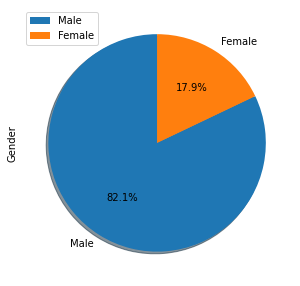

In [18]:
pie(loan_df.Gender)

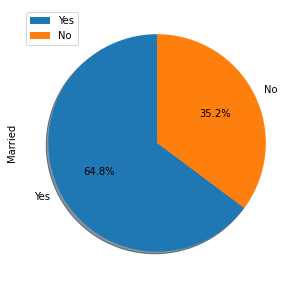

In [19]:
pie(loan_df.Married)

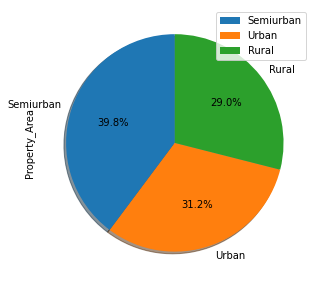

In [20]:
pie(loan_df.Property_Area)

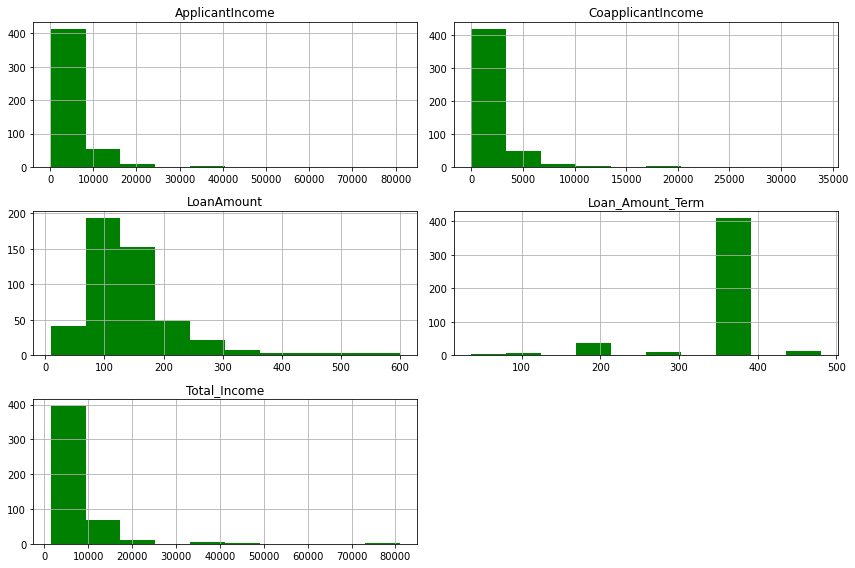

In [21]:
numerical_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']
loan_df[numerical_vars].hist(bins=10, figsize=(12, 8), color='green')
plt.tight_layout()
plt.show()



In [ ]:
#coorelation between Property area and total income


In [22]:
#Impact of Gender, Education, Self Employed and Credit History on Loan Status

In [23]:
def impact(column):
    #df=loan_df
    df = loan_df.pivot_table(index=column, columns='Loan_Status', aggfunc='size')
    sns.set_style('whitegrid')
    ax=df.plot(kind='bar', stacked=False, color=['pink', 'purple'])
    for container in ax.containers:
        ax.bar_label(container)
    #print(df)
    

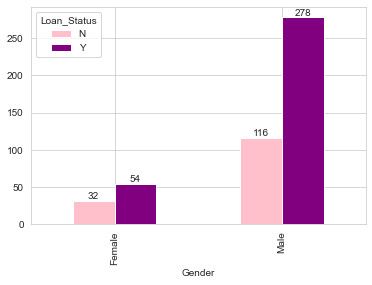

In [24]:
impact(loan_df.Gender)

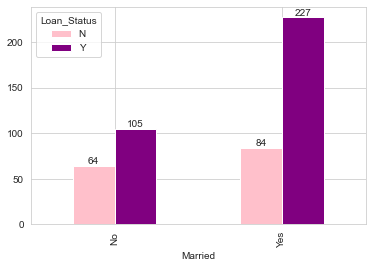

In [25]:
impact(loan_df.Married)

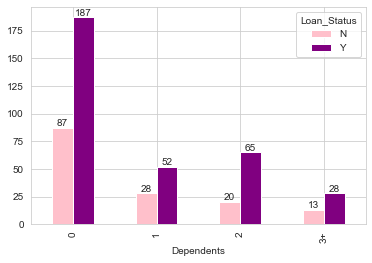

In [26]:
impact(loan_df.Dependents)

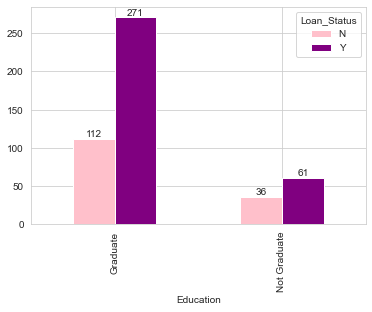

In [27]:
impact(loan_df.Education)

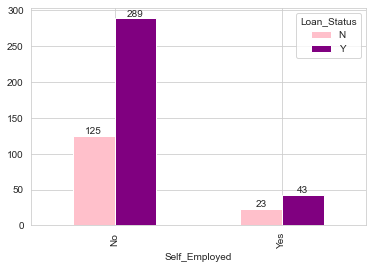

In [28]:
impact(loan_df.Self_Employed)

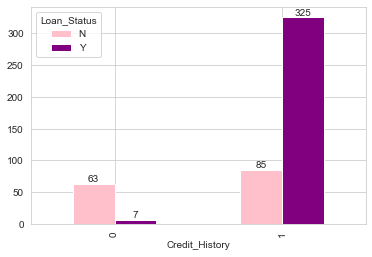

In [29]:
impact(loan_df.Credit_History)

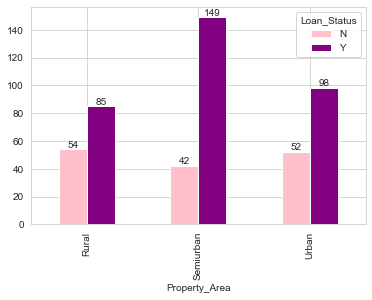

In [30]:
impact(loan_df.Property_Area)

In [66]:
#Does the total income impact the requested amount?

plt.figure(figsize=(15,10))
plt.title('How many YT channel in each ubscriber range?')
sns.set_style('whitegrid')
m = sns.barplot(x=topsubscribed_df['range_subs'].value_counts().index, y=topsubscribed_df['range_subs'].value_counts(), palette ='Paired')
m.set_xticklabels(topsubscribed_df['range_subs'].value_counts().index, rotation = 45)
m.set(xlabel ='range_subs', ylabel = 'Values')
plt.show()



KeyError: 'Total_Income '

<Figure size 1080x720 with 0 Axes>

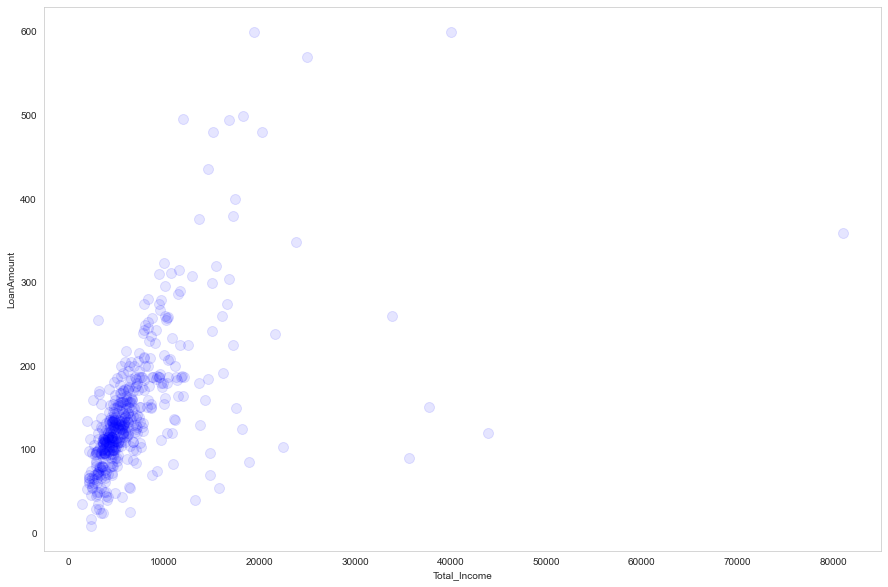

In [32]:
plt.figure(figsize=(15,10))
plt.scatter(loan_df['Total_Income'], loan_df['LoanAmount'],s=100, color='lime', alpha=0.1)
plt.xlabel('Total_Income')
plt.ylabel('LoanAmount')
plt.grid()
plt.show()

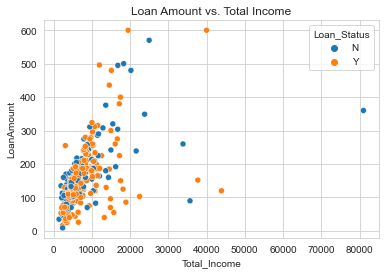

In [33]:
#Relationship between Loan Amount and Total Income
sns.scatterplot(x='Total_Income', y='LoanAmount', hue='Loan_Status', data=loan_df)
plt.title('Loan Amount vs. Total Income')
plt.show()

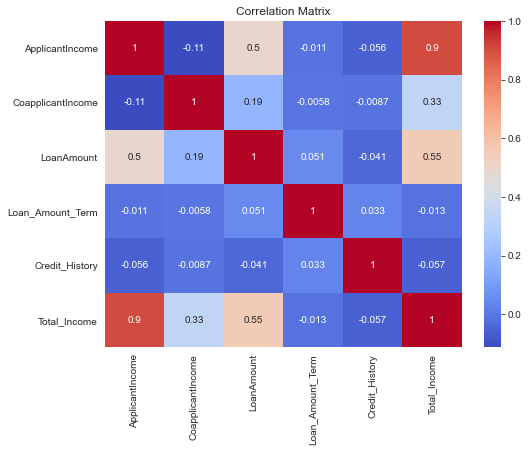

In [34]:
plt.figure(figsize=(8,6))
correlation_matrix = loan_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

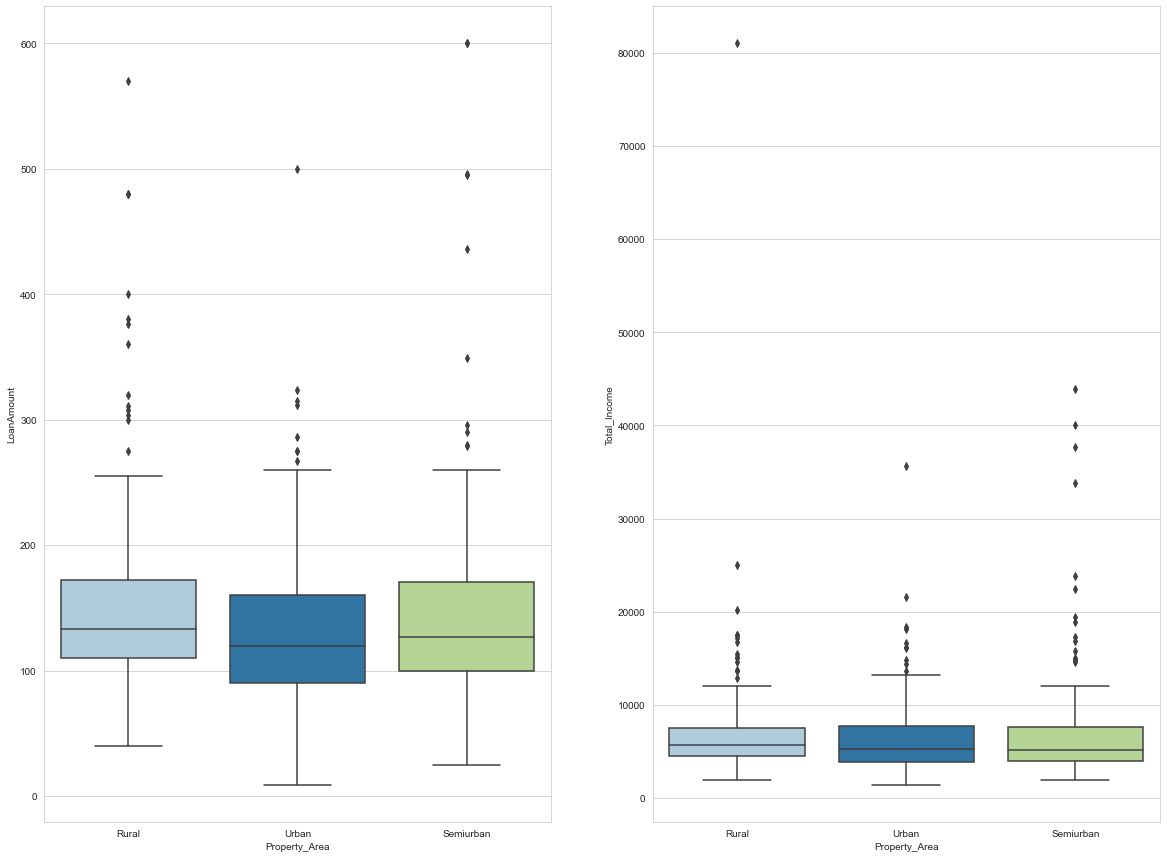

In [35]:
fig, axes = plt.subplots(1,2, figsize=(20, 15))
sns.boxplot(ax=axes[ 0], data=loan_df, x='Property_Area', y='LoanAmount', palette='Paired')
sns.boxplot(ax=axes[ 1], data=loan_df, x='Property_Area', y='Total_Income', palette='Paired')
plt.show()


In [36]:
loan_df['Loan_Status'] = loan_df['Loan_Status'].map({'Y': 1, 'N': 0})
loan_df['Loan_Status']

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [42]:
loan_num=loan_df.select_dtypes(include=[np.number])

In [44]:
loan_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
1,4583,1508,128,360,1,0,6091
2,3000,0,66,360,1,1,3000
3,2583,2358,120,360,1,1,4941
4,6000,0,141,360,1,1,6000
5,5417,4196,267,360,1,1,9613
...,...,...,...,...,...,...,...
609,2900,0,71,360,1,1,2900
610,4106,0,40,180,1,1,4106
611,8072,240,253,360,1,1,8312
612,7583,0,187,360,1,1,7583


In [ ]:
#Naive Bayes 

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection  import train_test_split

In [46]:
#We now divide our dataframe into x and y components. The x variable includes all independent predictor factors,
#whereas the y variable provides the diagnostic prediction.

x = loan_num.drop(["Loan_Status"], axis = 1)
y = loan_num.Loan_Status.values


In [51]:
x_train.shape, x_test.shape

((321, 6), (159, 6))

In [58]:
from sklearn.model_selection import train_test_split
y=y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [59]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
print(nb.fit(x_train, y_train))

GaussianNB()


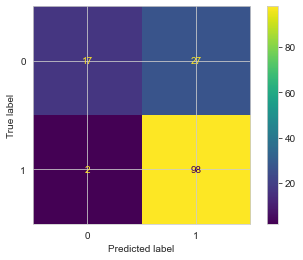

In [62]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb,x_test,y_test)

In [60]:
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.7986111111111112
